In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point

ModuleNotFoundError: No module named 'geopandas'

In [144]:
df_2020 = pd.read_excel('Datos\\2020.xlsx',index_col=None)
df_2021 = pd.read_excel('Datos\\2021.xlsx', index_col=None)
df_2022 = pd.read_excel('Datos\\2022.xlsx', index_col=None)
df_2020.drop('Unnamed: 0', axis=1, inplace=True)
#df_2021.drop('Unnamed: 0', axis=1, inplace=True)
#df_2022.drop('Unnamed: 0', axis=1, inplace=True)


In [145]:
df = pd.concat([df_2021, df_2022], axis=0)

In [146]:
df

,TEMPORADA,INICIO,SEMANA INICIO,SEMANA KPI,ANO INICIO,MES INICIO,DIA INICIO,HORA INICIO,COD_SEMANA,DIA_SEMANA,...,CUMPLE RAZ LIQ CON,CUMPLE SUP FINAL,LANZAMIENTOS,SUP,RENDIMIENTO LINEA,CUMPLE RENDIMIENTO LINEA,PROM INICIO COMBATE HELITRANS,CUMPLE INICIO R24 HELITRANS,MIN ARRIBO ZONA CONFLICTO,APOYO POLICIAL
0,2021,2020-08-22 13:58:26,34,35,2020,Agosto,22,13,2021-35,sábado,...,SI,SI,NaN,5000m2,0.69,NO,NaN,NaN,NaN,NO
1,2021,2020-08-30 21:38:22,35,36,2020,Agosto,30,21,2021-36,domingo,...,SI,SI,NaN,1000m2,0.09,NO,NaN,NaN,NaN,NO
2,2021,2020-09-04 07:24:49,36,36,2020,Septiembre,4,7,2021-36,viernes,...,SI,SI,NaN,5000m2,0.56,NO,NaN,NaN,NaN,NO
3,2021,2020-09-14 15:11:23,38,38,2020,Septiembre,14,15,2021-38,lunes,...,SI,SI,NaN,5000m2,1.48,SI,NaN,NaN,NaN,NO
4,2021,2020-09-18 12:35:12,38,38,2020,Septiembre,18,12,2021-38,viernes,...,SI,SI,NaN,1000m2,NaN,NaN,NaN,NaN,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2022,2022-02-21 18:49:37,8,8,2022,Febrero,21,18,2022-08,lunes,...,SI,SI,1.0,NaN,NaN,NaN,1.0,SI,NaN,NO
1823,2022,2022-02-22 15:47:15,8,8,2022,Febrero,22,15,2022-08,martes,...,SI,NO,6.0,NaN,1.79,SI,6.3,SI,NaN,NO
1824,2022,2022-02-22 17:41:55,8,8,2022,Febrero,22,17,2022-08,martes,...,SI,SI,6.0,NaN,0.27,NO,NaN,NaN,NaN,NO
1825,2022,2022-03-20 14:53:39,11,12,2022,Marzo,20,14,2022-12,domingo,...,NO,SI,2.0,NaN,1.55,SI,NaN,NaN,NaN,NO


<Figure size 1200x600 with 0 Axes>

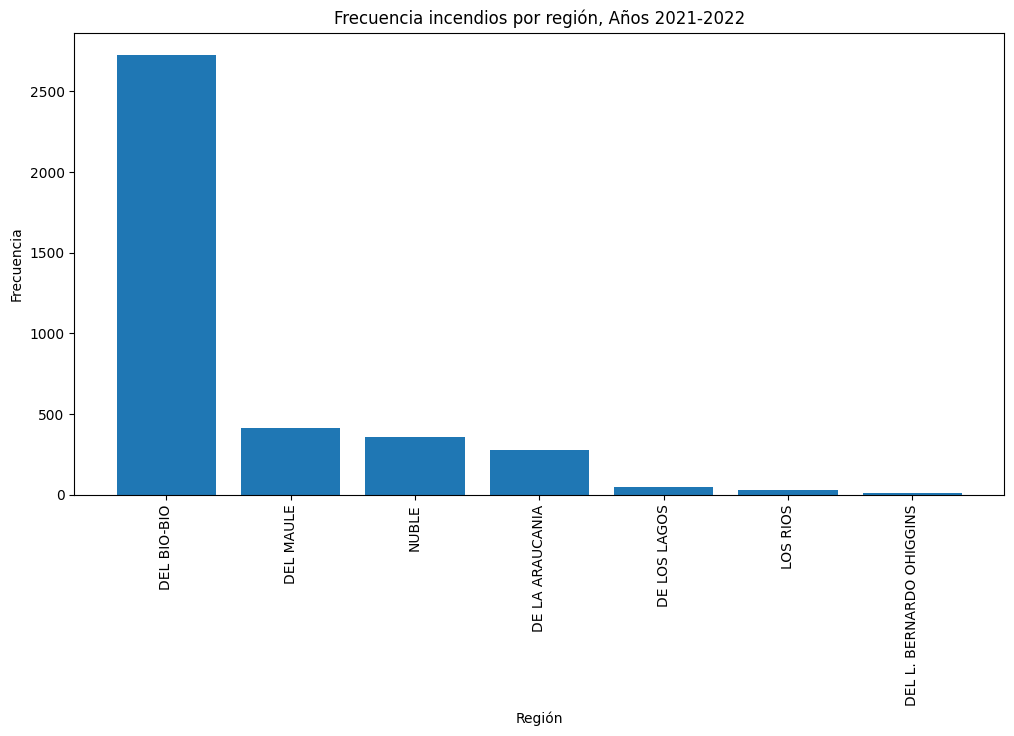

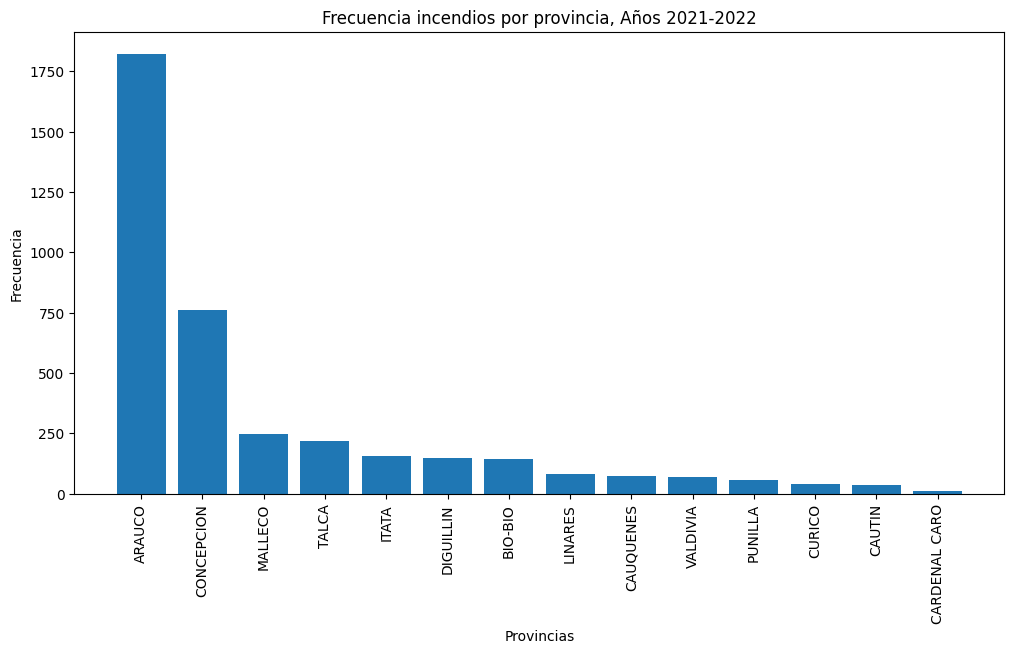

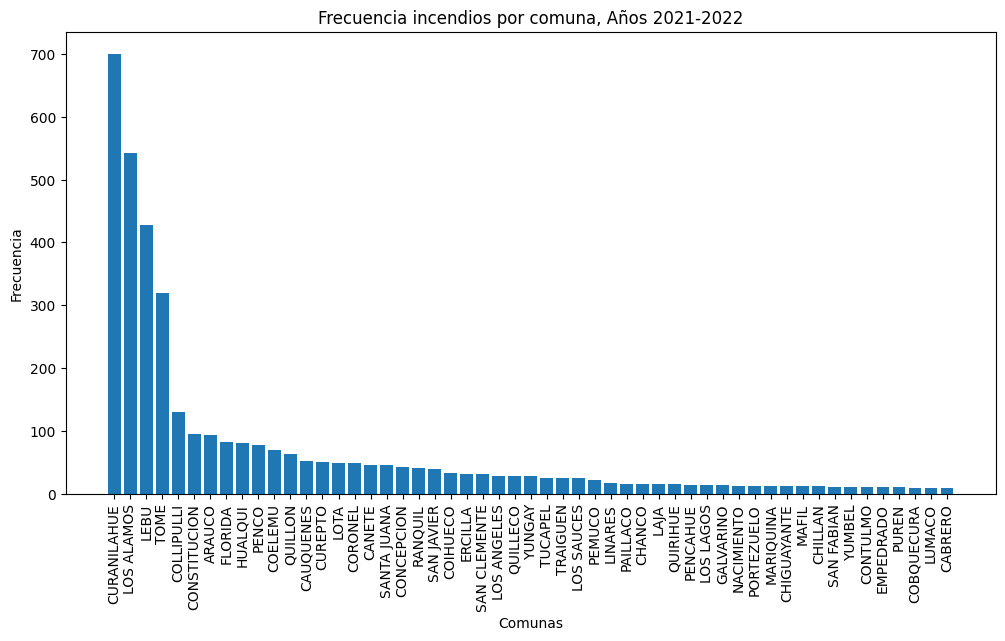

In [147]:
plt.figure(figsize=(12, 6)) 


# Regiones con mas incendios
freq = df['REGION'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6))  

plt.bar(freq.index, freq.values)
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por región, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

# Provincias con mas incendios
freq = df['PROVINCIA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Provincias')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por provincia, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

# Comunas con mas incendios
freq = df['COMUNA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Comunas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por comuna, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

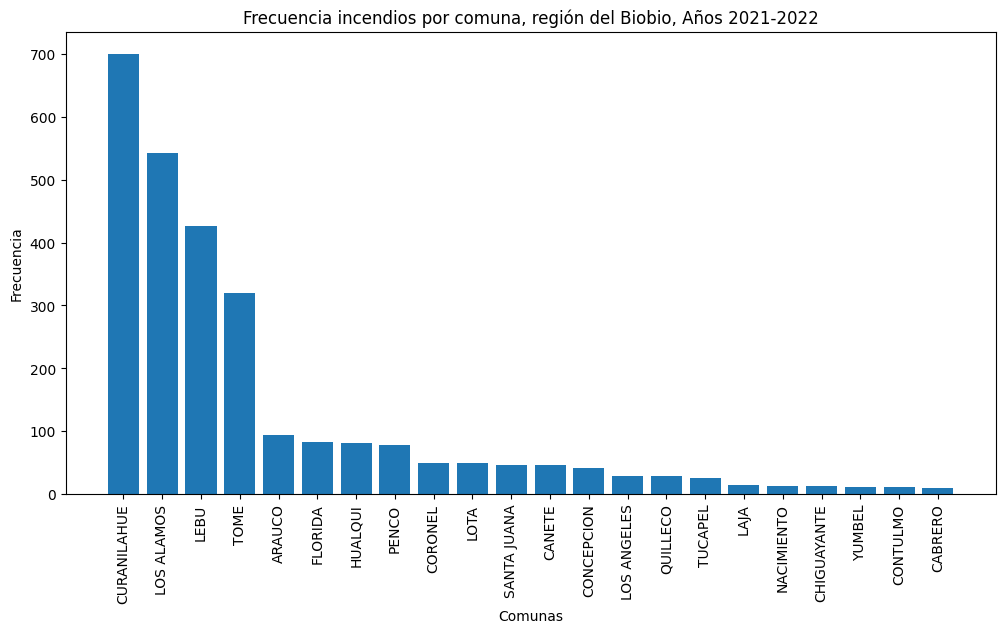

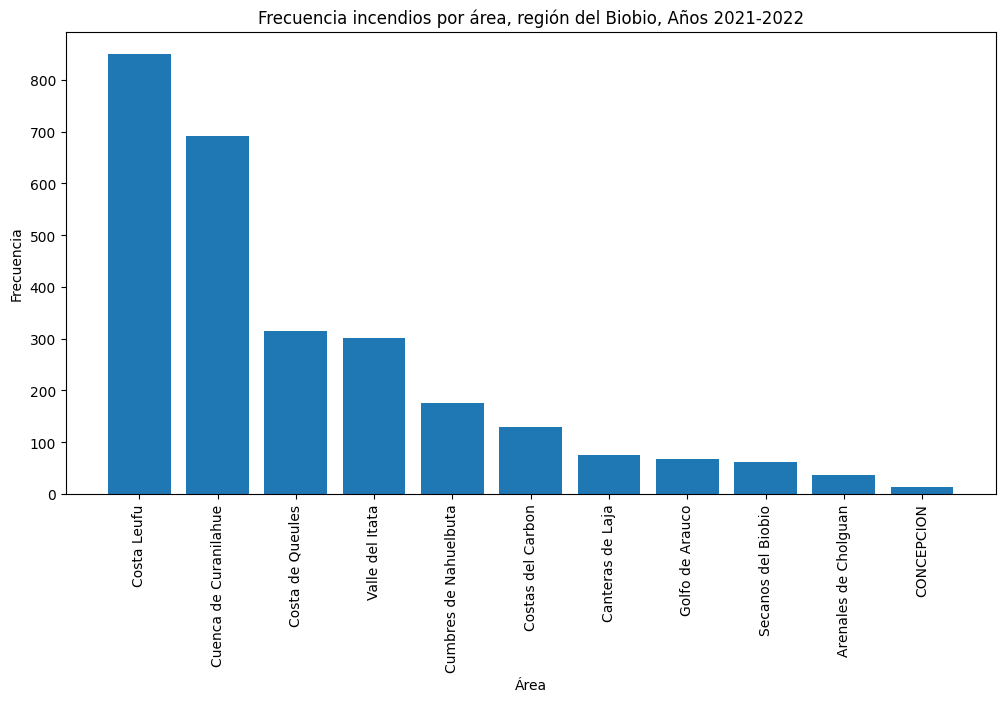

In [148]:
# Concentrarse en la Región del Biobio

df_biobio = df[df['REGION'] == "DEL BIO-BIO"]

# Comunas con mas incendios
freq = df_biobio['COMUNA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Comunas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por comuna, región del Biobio, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

# Areas con mas incendios

freq = df_biobio['AREA'].value_counts()
umbral_minimo = 10
freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6)) 

plt.bar(freq.index, freq.values)
plt.xlabel('Área')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por área, región del Biobio, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()

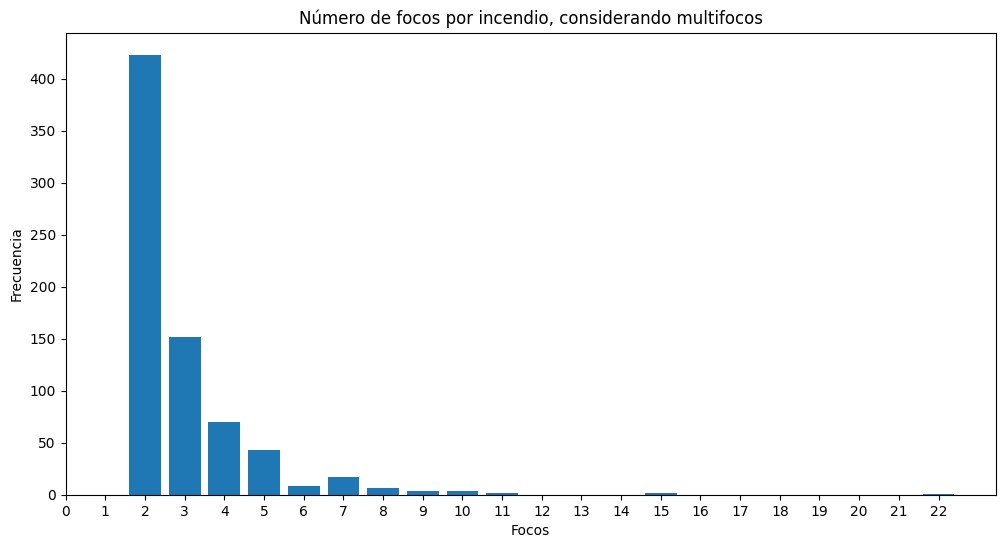

In [149]:
focos =  df[df['MULTIFOCO'] == 'SI']

focos = focos['FOCOS'].value_counts()

umbral_maximo = 1000000
focos = focos[focos <= umbral_maximo]

plt.figure(figsize=(12, 6)) 

plt.bar(focos.index, focos.values)

# Añade etiquetas y título
plt.xlabel('Focos')
plt.ylabel('Frecuencia')
plt.title('Número de focos por incendio, considerando multifocos')
plt.xticks(list(range((max(focos.index)+1))))

# Muestra el gráfico
plt.show()

In [150]:
df["MULTIFOCO"].value_counts()

MULTIFOCO
NO    3133
SI     732
Name: count, dtype: int64

In [151]:
df["DANO PLANTAC"].value_counts()

DANO PLANTAC
NO    3731
SI     134
Name: count, dtype: int64

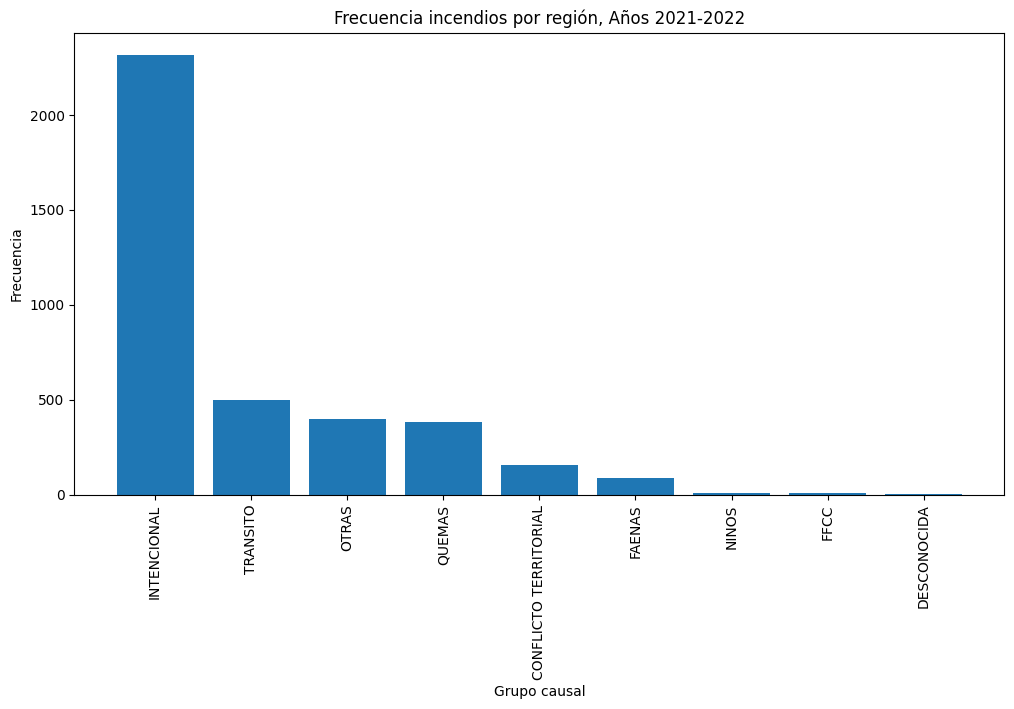

In [152]:
# Grupo causal

freq = df['GRUPO CAUSAL'].value_counts()
#umbral_minimo = 10
#freq = freq[freq >= umbral_minimo]

plt.figure(figsize=(12, 6))  

plt.bar(freq.index, freq.values)
plt.xlabel('Grupo causal')
plt.ylabel('Frecuencia')
plt.title('Frecuencia incendios por región, Años 2021-2022')
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x para mayor legibilidad
plt.show()


In [156]:
# Supongamos que tienes un DataFrame llamado df con columnas 'latitud' y 'longitud'

df2 = df[df['LATITUD'] != -85.522789599693]

geometry = [Point(xy) for xy in zip(df2['LONGITUD'], df2['LATITUD'])]
crs = {'init': 'epsg:4326'}  # WGS84 (sistema de coordenadas utilizado para latitud y longitud)

gdf = gpd.GeoDataFrame(df2, crs=crs, geometry=geometry)


c:\Users\joaci\anaconda3\envs\envU\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [171]:
# Por ejemplo, carga límites de un país (sustituye 'nombre_pais' con el nombre correcto)
chile_regions = gpd.read_file('Comunas\\comunas.shp')

lat_min, lat_max = -30, -40  # Límites de latitud para Chile
lon_min, lon_max = -75, -66  # Límites de longitud para Chile




C:\Users\joaci\AppData\Local\Temp\ipykernel_15120\2921962269.py:5: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = filtered_data.plot(figsize=(10, 10))


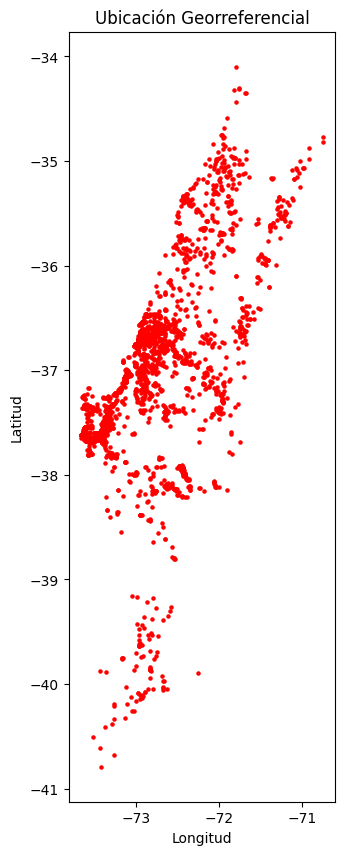

In [172]:
# Filtra los datos para mostrar solo la región de interés
filtered_data = chile_regions.cx[lon_min:lon_max, lat_min:lat_max]

# Dibuja el mapa acotado
ax = filtered_data.plot(figsize=(10, 10))

# Superpone tus datos
gdf.plot(ax=plt.gca(), marker='o', color='red', markersize=5)

# Añade etiquetas y título
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicación Georreferencial')

# Muestra el gráfico
plt.show()
